In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('./dataset/P5/in/p5_input_dataset_1.csv')
data

,OriginCity,OriginLat,OriginLong,DestCity,DestLat,DestLong,Distance,TimeOfFlight,AirFarePrice
0,City_1,38.34,-115.38,City_2,44.41,-110.69,779.87,3.58,957.0
1,City_1,38.34,-115.38,City_3,30.00,-102.72,1486.31,1.53,448.0
2,City_1,38.34,-115.38,City_4,36.05,-100.16,1370.29,NaN,NaN
3,City_1,38.34,-115.38,City_5,32.94,-93.06,2098.47,3.01,553.0
4,City_2,44.41,-110.69,City_3,30.00,-102.72,1748.76,NaN,NaN
5,City_2,44.41,-110.69,City_4,36.05,-100.16,1287.56,NaN,NaN
6,City_2,44.41,-110.69,City_5,32.94,-93.06,1984.64,NaN,NaN
7,City_3,30.00,-102.72,City_4,36.05,-100.16,713.73,NaN,NaN
8,City_3,30.00,-102.72,City_5,32.94,-93.06,972.25,2.83,946.0
9,City_4,36.05,-100.16,City_5,32.94,-93.06,736.57,NaN,NaN


In [2]:
data["Distance"] = data["Distance"].replace(' ', np.nan)
data["TimeOfFlight"] = data["TimeOfFlight"].replace(' ', np.nan)

In [3]:
data["Distance"] = pd.to_numeric(data["Distance"], errors="coerce")
data["TimeOfFlight"] = pd.to_numeric(data["TimeOfFlight"], errors="coerce")
data["AirFarePrice"] = pd.to_numeric(data["AirFarePrice"], errors="coerce")

In [4]:
def find_cheapest_flight(origin, destination):
    filtered_data = data[(data["OriginCity"] == origin) & (data["DestCity"] == destination)]
    if not filtered_data.empty:
        cheapest_flight = filtered_data.nsmallest(1, "AirFarePrice")
        return cheapest_flight
    else:
        return None


In [5]:
def find_most_expensive_flight(origin, destination):
    filtered_data = data[(data["OriginCity"] == origin) & (data["DestCity"] == destination)]
    if not filtered_data.empty:
        expensive_flight = filtered_data.nlargest(1, "AirFarePrice")
        return expensive_flight
    else:
        return None

In [6]:
unique_cities = data["OriginCity"].unique()

cheapest_flights = pd.DataFrame(columns=data.columns)
most_expensive_flights = pd.DataFrame(columns=data.columns)

In [7]:
for origin_city in unique_cities:
    for destination_city in unique_cities:
        if origin_city != destination_city:
            cheapest_flight = find_cheapest_flight(origin_city, destination_city)
            most_expensive_flight = find_most_expensive_flight(origin_city, destination_city)
            
            if cheapest_flight is not None:
                cheapest_flights = pd.concat([cheapest_flights, cheapest_flight], ignore_index=True)
            if most_expensive_flight is not None:
                most_expensive_flights = pd.concat([most_expensive_flights, most_expensive_flight], ignore_index=True)

In [8]:
all_flight_data = pd.concat([cheapest_flights, most_expensive_flights], ignore_index=True)
all_flight_data = all_flight_data.drop_duplicates(subset=["OriginCity", "DestCity"])
all_flight_data.to_csv("./dataset/P5/out/p5-output-dataset-1.csv", index=False)

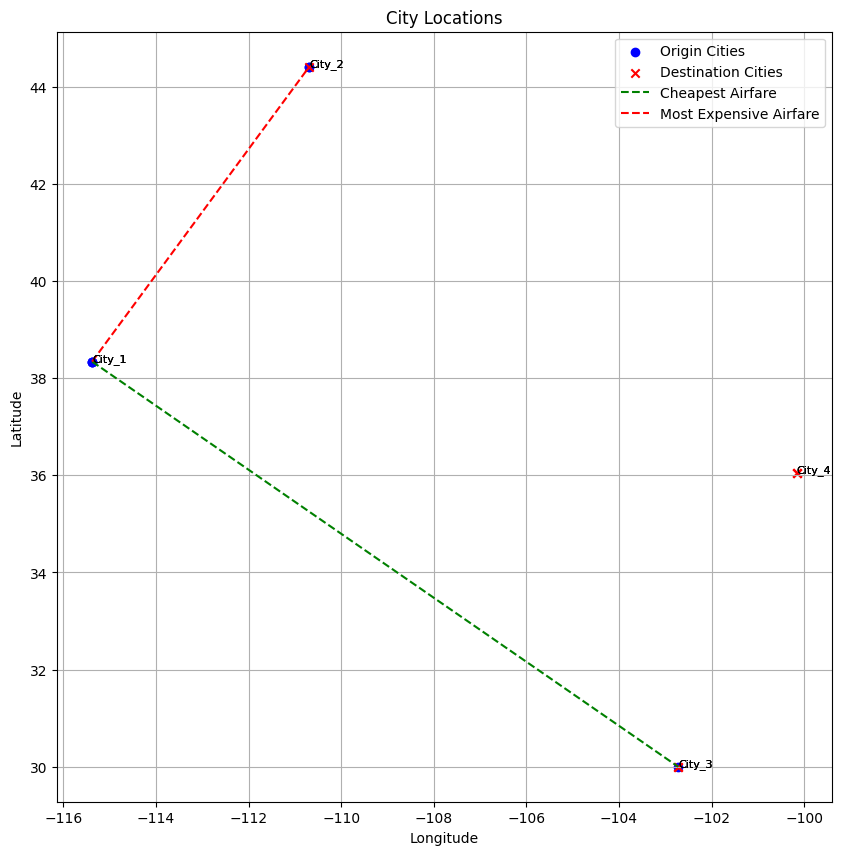

In [9]:
plt.figure(figsize=(10, 6))

plt.scatter(all_flight_data['OriginLong'], all_flight_data['OriginLat'], label='Origin Cities', color='blue', marker='o')

plt.scatter(all_flight_data['DestLong'], all_flight_data['DestLat'], label='Destination Cities', color='red', marker='x')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('City Locations')

for i, row in all_flight_data.iterrows():
    plt.text(row['OriginLong'], row['OriginLat'], row['OriginCity'], fontsize=8)
    plt.text(row['DestLong'], row['DestLat'], row['DestCity'], fontsize=8)
expensive_row = data[data['AirFarePrice'] == data['AirFarePrice'].max()]
cheapest_row = all_flight_data[all_flight_data['AirFarePrice'] == all_flight_data['AirFarePrice'].min()]

plt.plot([cheapest_row['OriginLong'], cheapest_row['DestLong']], [cheapest_row['OriginLat'], cheapest_row['DestLat']], 'g--', label='Cheapest Airfare')
plt.plot([expensive_row['OriginLong'], expensive_row['DestLong']], [expensive_row['OriginLat'], expensive_row['DestLat']], 'r--', label='Most Expensive Airfare')
plt.legend()

plt.grid(True)
fig = plt.gcf()
fig.set_size_inches(10, 10)
plt.savefig("./dataset/P5/out/p5_plot_1.png",dpi=100)
plt.show()

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('./dataset/P5/in/p5_input_dataset_2.csv')
data

,OriginCity,OriginLat,OriginLong,DestCity,DestLat,DestLong,Distance,TimeOfFlight,AirFarePrice
0,City_1,38.72,-88.94,City_2,30.52,-93.54,1003.89,NaN,NaN
1,City_1,38.72,-88.94,City_3,40.99,-113.27,2085.27,2.43,81.0
2,City_1,38.72,-88.94,City_4,38.71,-94.32,466.71,2.72,100.0
3,City_1,38.72,-88.94,City_5,38.41,-110.78,1894.65,3.95,611.0
4,City_1,38.72,-88.94,City_6,36.61,-80.73,759.46,2.61,484.0
5,City_1,38.72,-88.94,City_7,34.09,-77.30,1160.75,3.44,543.0
6,City_1,38.72,-88.94,City_8,42.39,-95.29,673.72,NaN,NaN
7,City_1,38.72,-88.94,City_9,35.99,-77.67,1040.54,4.07,935.0
8,City_1,38.72,-88.94,City_10,35.34,-116.02,2424.01,1.17,814.0
9,City_2,30.52,-93.54,City_3,40.99,-113.27,2119.38,NaN,NaN


In [11]:
data["Distance"] = data["Distance"].replace(' ', np.nan)
data["TimeOfFlight"] = data["TimeOfFlight"].replace(' ', np.nan)

In [12]:
data["Distance"] = pd.to_numeric(data["Distance"], errors="coerce")
data["TimeOfFlight"] = pd.to_numeric(data["TimeOfFlight"], errors="coerce")
data["AirFarePrice"] = pd.to_numeric(data["AirFarePrice"], errors="coerce")

In [13]:
def find_cheapest_flight(origin, destination):
    filtered_data = data[(data["OriginCity"] == origin) & (data["DestCity"] == destination)]
    if not filtered_data.empty:
        cheapest_flight = filtered_data.nsmallest(1, "AirFarePrice")
        return cheapest_flight
    else:
        return None


In [14]:
def find_most_expensive_flight(origin, destination):
    filtered_data = data[(data["OriginCity"] == origin) & (data["DestCity"] == destination)]
    if not filtered_data.empty:
        expensive_flight = filtered_data.nlargest(1, "AirFarePrice")
        return expensive_flight
    else:
        return None

In [15]:
unique_cities = data["OriginCity"].unique()

cheapest_flights = pd.DataFrame(columns=data.columns)
most_expensive_flights = pd.DataFrame(columns=data.columns)

In [16]:
for origin_city in unique_cities:
    for destination_city in unique_cities:
        if origin_city != destination_city:
            cheapest_flight = find_cheapest_flight(origin_city, destination_city)
            most_expensive_flight = find_most_expensive_flight(origin_city, destination_city)
            
            if cheapest_flight is not None:
                cheapest_flights = pd.concat([cheapest_flights, cheapest_flight], ignore_index=True)
            if most_expensive_flight is not None:
                most_expensive_flights = pd.concat([most_expensive_flights, most_expensive_flight], ignore_index=True)

In [17]:
all_flight_data = pd.concat([cheapest_flights, most_expensive_flights], ignore_index=True)
all_flight_data = all_flight_data.drop_duplicates(subset=["OriginCity", "DestCity"])
all_flight_data.to_csv("./dataset/P5/out/p5-output-dataset-2.csv", index=False)

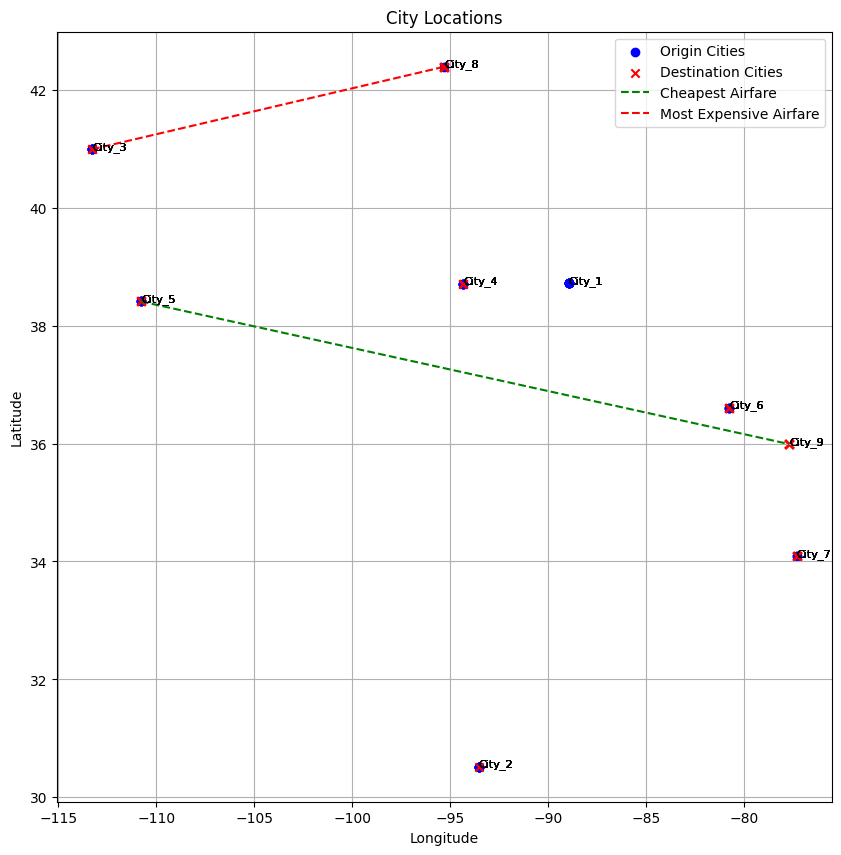

In [18]:
plt.figure(figsize=(10, 6))

plt.scatter(all_flight_data['OriginLong'], all_flight_data['OriginLat'], label='Origin Cities', color='blue', marker='o')

plt.scatter(all_flight_data['DestLong'], all_flight_data['DestLat'], label='Destination Cities', color='red', marker='x')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('City Locations')

for i, row in all_flight_data.iterrows():
    plt.text(row['OriginLong'], row['OriginLat'], row['OriginCity'], fontsize=8)
    plt.text(row['DestLong'], row['DestLat'], row['DestCity'], fontsize=8)
expensive_row = data[data['AirFarePrice'] == data['AirFarePrice'].max()]
cheapest_row = all_flight_data[all_flight_data['AirFarePrice'] == all_flight_data['AirFarePrice'].min()]

plt.plot([cheapest_row['OriginLong'], cheapest_row['DestLong']], [cheapest_row['OriginLat'], cheapest_row['DestLat']], 'g--', label='Cheapest Airfare')
plt.plot([expensive_row['OriginLong'], expensive_row['DestLong']], [expensive_row['OriginLat'], expensive_row['DestLat']], 'r--', label='Most Expensive Airfare')
plt.legend()

plt.grid(True)
fig = plt.gcf()
fig.set_size_inches(10, 10)
plt.savefig("./dataset/P5/out/p5_plot_2.png",dpi=100)
plt.show()

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('./dataset/P5/in/p5_input_dataset_3.csv')
data

,OriginCity,OriginLat,OriginLong,DestCity,DestLat,DestLong,Distance,TimeOfFlight,AirFarePrice
0,City_1,41.02,-90.46,City_2,44.16,-118.80,2334.28,NaN,NaN
1,City_1,41.02,-90.46,City_3,35.82,-92.06,594.74,NaN,NaN
2,City_1,41.02,-90.46,City_4,40.22,-107.04,1400.10,NaN,NaN
3,City_1,41.02,-90.46,City_5,47.86,-99.24,1030.36,NaN,NaN
4,City_1,41.02,-90.46,City_6,47.93,-105.82,1436.76,0.91,215.0
...,...,...,...,...,...,...,...,...,...
100,City_12,39.14,-104.68,City_14,35.57,-100.60,536.19,3.28,712.0
101,City_12,39.14,-104.68,City_15,43.53,-73.18,2658.38,NaN,NaN
102,City_13,42.98,-108.90,City_14,35.57,-100.60,1089.42,3.28,949.0
103,City_13,42.98,-108.90,City_15,43.53,-73.18,2870.97,NaN,NaN


In [20]:
data["Distance"] = data["Distance"].replace(' ', np.nan)
data["TimeOfFlight"] = data["TimeOfFlight"].replace(' ', np.nan)

In [21]:
data["Distance"] = pd.to_numeric(data["Distance"], errors="coerce")
data["TimeOfFlight"] = pd.to_numeric(data["TimeOfFlight"], errors="coerce")
data["AirFarePrice"] = pd.to_numeric(data["AirFarePrice"], errors="coerce")

In [22]:
def find_cheapest_flight(origin, destination):
    filtered_data = data[(data["OriginCity"] == origin) & (data["DestCity"] == destination)]
    if not filtered_data.empty:
        cheapest_flight = filtered_data.nsmallest(1, "AirFarePrice")
        return cheapest_flight
    else:
        return None


In [23]:
def find_most_expensive_flight(origin, destination):
    filtered_data = data[(data["OriginCity"] == origin) & (data["DestCity"] == destination)]
    if not filtered_data.empty:
        expensive_flight = filtered_data.nlargest(1, "AirFarePrice")
        return expensive_flight
    else:
        return None

In [24]:
unique_cities = data["OriginCity"].unique()

cheapest_flights = pd.DataFrame(columns=data.columns)
most_expensive_flights = pd.DataFrame(columns=data.columns)

In [25]:
for origin_city in unique_cities:
    for destination_city in unique_cities:
        if origin_city != destination_city:
            cheapest_flight = find_cheapest_flight(origin_city, destination_city)
            most_expensive_flight = find_most_expensive_flight(origin_city, destination_city)
            
            if cheapest_flight is not None:
                cheapest_flights = pd.concat([cheapest_flights, cheapest_flight], ignore_index=True)
            if most_expensive_flight is not None:
                most_expensive_flights = pd.concat([most_expensive_flights, most_expensive_flight], ignore_index=True)

In [26]:
all_flight_data = pd.concat([cheapest_flights, most_expensive_flights], ignore_index=True)
all_flight_data = all_flight_data.drop_duplicates(subset=["OriginCity", "DestCity"])
all_flight_data.to_csv("./dataset/P5/out/p5-output-dataset-3.csv", index=False)

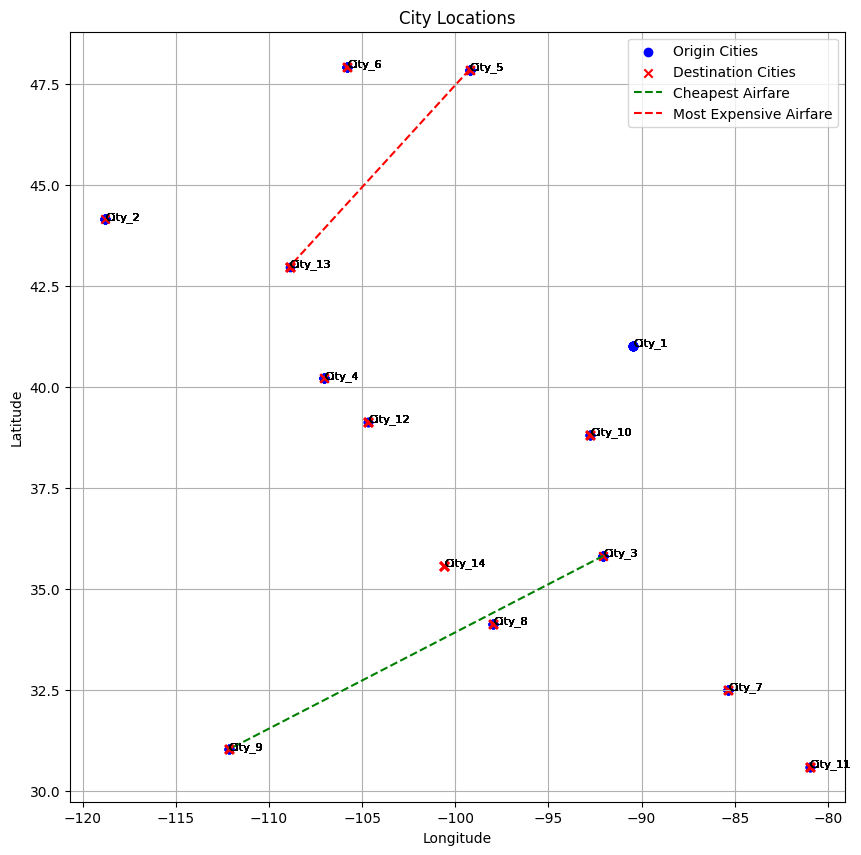

In [27]:
plt.figure(figsize=(10, 6))

plt.scatter(all_flight_data['OriginLong'], all_flight_data['OriginLat'], label='Origin Cities', color='blue', marker='o')

plt.scatter(all_flight_data['DestLong'], all_flight_data['DestLat'], label='Destination Cities', color='red', marker='x')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('City Locations')

for i, row in all_flight_data.iterrows():
    plt.text(row['OriginLong'], row['OriginLat'], row['OriginCity'], fontsize=8)
    plt.text(row['DestLong'], row['DestLat'], row['DestCity'], fontsize=8)
expensive_row = data[data['AirFarePrice'] == data['AirFarePrice'].max()]
cheapest_row = all_flight_data[all_flight_data['AirFarePrice'] == all_flight_data['AirFarePrice'].min()]

plt.plot([cheapest_row['OriginLong'], cheapest_row['DestLong']], [cheapest_row['OriginLat'], cheapest_row['DestLat']], 'g--', label='Cheapest Airfare')
plt.plot([expensive_row['OriginLong'], expensive_row['DestLong']], [expensive_row['OriginLat'], expensive_row['DestLat']], 'r--', label='Most Expensive Airfare')
plt.legend()

plt.grid(True)
fig = plt.gcf()
fig.set_size_inches(10, 10)
plt.savefig("./dataset/P5/out/p5_plot_3.png",dpi=100)
plt.show()

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('./dataset/P5/in/p5_input_dataset_4.csv')
data

,OriginCity,OriginLat,OriginLong,DestCity,DestLat,DestLong,Distance,TimeOfFlight,AirFarePrice
0,City_1,49.34,-98.19,City_2,40.94,-72.55,2203.06,3.31,793.0
1,City_1,49.34,-98.19,City_3,49.45,-80.68,1264.41,3.10,516.0
2,City_1,49.34,-98.19,City_4,44.30,-76.69,1722.20,NaN,NaN
3,City_1,49.34,-98.19,City_5,43.95,-111.34,1166.75,NaN,NaN
4,City_1,49.34,-98.19,City_6,34.32,-116.25,2230.77,3.00,109.0
...,...,...,...,...,...,...,...,...,...
185,City_17,30.18,-93.78,City_19,30.88,-99.93,594.08,NaN,NaN
186,City_17,30.18,-93.78,City_20,49.13,-87.51,2172.55,4.12,482.0
187,City_18,37.73,-88.12,City_19,30.88,-99.93,1323.71,3.67,992.0
188,City_18,37.73,-88.12,City_20,49.13,-87.51,1268.57,NaN,NaN


In [29]:
data["Distance"] = data["Distance"].replace(' ', np.nan)
data["TimeOfFlight"] = data["TimeOfFlight"].replace(' ', np.nan)

In [30]:
data["Distance"] = pd.to_numeric(data["Distance"], errors="coerce")
data["TimeOfFlight"] = pd.to_numeric(data["TimeOfFlight"], errors="coerce")
data["AirFarePrice"] = pd.to_numeric(data["AirFarePrice"], errors="coerce")

In [31]:
def find_cheapest_flight(origin, destination):
    filtered_data = data[(data["OriginCity"] == origin) & (data["DestCity"] == destination)]
    if not filtered_data.empty:
        cheapest_flight = filtered_data.nsmallest(1, "AirFarePrice")
        return cheapest_flight
    else:
        return None


In [32]:
def find_most_expensive_flight(origin, destination):
    filtered_data = data[(data["OriginCity"] == origin) & (data["DestCity"] == destination)]
    if not filtered_data.empty:
        expensive_flight = filtered_data.nlargest(1, "AirFarePrice")
        return expensive_flight
    else:
        return None

In [33]:
unique_cities = data["OriginCity"].unique()

cheapest_flights = pd.DataFrame(columns=data.columns)
most_expensive_flights = pd.DataFrame(columns=data.columns)

In [34]:
for origin_city in unique_cities:
    for destination_city in unique_cities:
        if origin_city != destination_city:
            cheapest_flight = find_cheapest_flight(origin_city, destination_city)
            most_expensive_flight = find_most_expensive_flight(origin_city, destination_city)
            
            if cheapest_flight is not None:
                cheapest_flights = pd.concat([cheapest_flights, cheapest_flight], ignore_index=True)
            if most_expensive_flight is not None:
                most_expensive_flights = pd.concat([most_expensive_flights, most_expensive_flight], ignore_index=True)

In [35]:
all_flight_data = pd.concat([cheapest_flights, most_expensive_flights], ignore_index=True)
all_flight_data = all_flight_data.drop_duplicates(subset=["OriginCity", "DestCity"])
all_flight_data.to_csv("./dataset/P5/out/p5-output-dataset-4.csv", index=False)

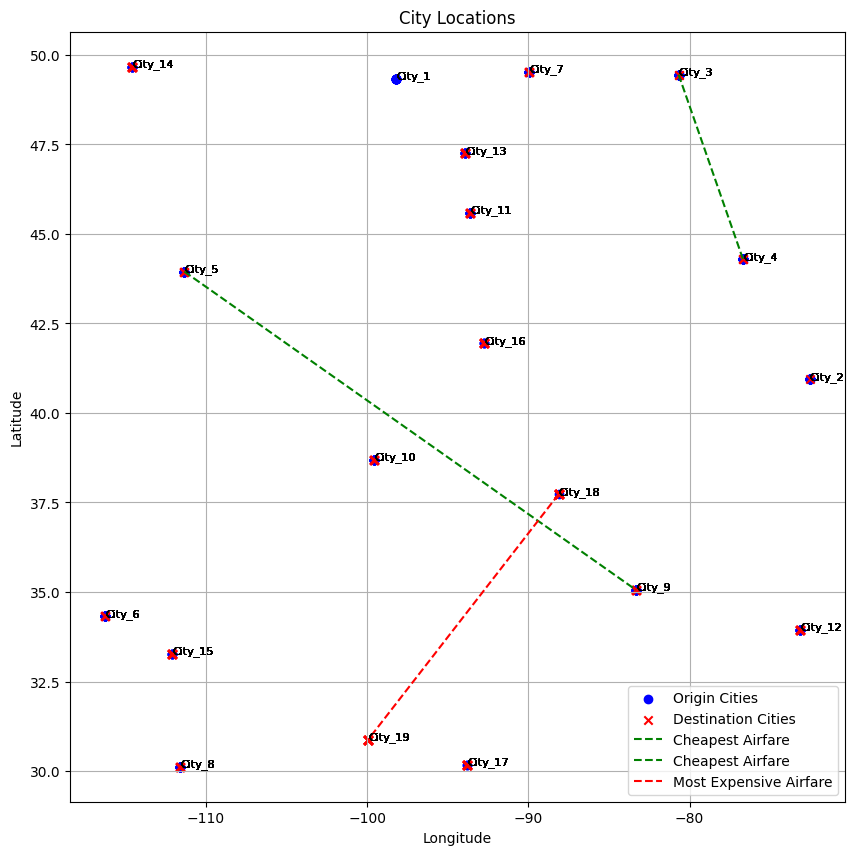

In [36]:
plt.figure(figsize=(10, 6))

plt.scatter(all_flight_data['OriginLong'], all_flight_data['OriginLat'], label='Origin Cities', color='blue', marker='o')

plt.scatter(all_flight_data['DestLong'], all_flight_data['DestLat'], label='Destination Cities', color='red', marker='x')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('City Locations')

for i, row in all_flight_data.iterrows():
    plt.text(row['OriginLong'], row['OriginLat'], row['OriginCity'], fontsize=8)
    plt.text(row['DestLong'], row['DestLat'], row['DestCity'], fontsize=8)
expensive_row = data[data['AirFarePrice'] == data['AirFarePrice'].max()]
cheapest_row = all_flight_data[all_flight_data['AirFarePrice'] == all_flight_data['AirFarePrice'].min()]

plt.plot([cheapest_row['OriginLong'], cheapest_row['DestLong']], [cheapest_row['OriginLat'], cheapest_row['DestLat']], 'g--', label='Cheapest Airfare')
plt.plot([expensive_row['OriginLong'], expensive_row['DestLong']], [expensive_row['OriginLat'], expensive_row['DestLat']], 'r--', label='Most Expensive Airfare')
plt.legend()

plt.grid(True)
fig = plt.gcf()
fig.set_size_inches(10, 10)
plt.savefig("./dataset/P5/out/p5_plot_4.png",dpi=100)
plt.show()

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('./dataset/P5/in/p5_input_dataset_5.csv')
data

,OriginCity,OriginLat,OriginLong,DestCity,DestLat,DestLong,Distance,TimeOfFlight,AirFarePrice
0,City_1,34.44,-112.79,City_2,47.41,-111.72,1444.96,NaN,NaN
1,City_1,34.44,-112.79,City_3,34.13,-71.80,3739.73,0.63,82.0
2,City_1,34.44,-112.79,City_4,48.37,-71.99,3683.64,2.63,225.0
3,City_1,34.44,-112.79,City_5,39.77,-110.58,624.17,NaN,NaN
4,City_1,34.44,-112.79,City_6,42.23,-118.78,1010.92,NaN,NaN
...,...,...,...,...,...,...,...,...,...
295,City_22,35.32,-70.93,City_24,35.07,-79.31,761.75,1.12,335.0
296,City_22,35.32,-70.93,City_25,36.55,-92.68,1958.81,NaN,NaN
297,City_23,35.69,-100.05,City_24,35.07,-79.31,1878.07,NaN,NaN
298,City_23,35.69,-100.05,City_25,36.55,-92.68,668.68,3.65,195.0


In [38]:
data["Distance"] = data["Distance"].replace(' ', np.nan)
data["TimeOfFlight"] = data["TimeOfFlight"].replace(' ', np.nan)

In [39]:
data["Distance"] = pd.to_numeric(data["Distance"], errors="coerce")
data["TimeOfFlight"] = pd.to_numeric(data["TimeOfFlight"], errors="coerce")
data["AirFarePrice"] = pd.to_numeric(data["AirFarePrice"], errors="coerce")

In [40]:
def find_cheapest_flight(origin, destination):
    filtered_data = data[(data["OriginCity"] == origin) & (data["DestCity"] == destination)]
    if not filtered_data.empty:
        cheapest_flight = filtered_data.nsmallest(1, "AirFarePrice")
        return cheapest_flight
    else:
        return None


In [41]:
def find_most_expensive_flight(origin, destination):
    filtered_data = data[(data["OriginCity"] == origin) & (data["DestCity"] == destination)]
    if not filtered_data.empty:
        expensive_flight = filtered_data.nlargest(1, "AirFarePrice")
        return expensive_flight
    else:
        return None

In [42]:
unique_cities = data["OriginCity"].unique()

cheapest_flights = pd.DataFrame(columns=data.columns)
most_expensive_flights = pd.DataFrame(columns=data.columns)

In [43]:
for origin_city in unique_cities:
    for destination_city in unique_cities:
        if origin_city != destination_city:
            cheapest_flight = find_cheapest_flight(origin_city, destination_city)
            most_expensive_flight = find_most_expensive_flight(origin_city, destination_city)
            
            if cheapest_flight is not None:
                cheapest_flights = pd.concat([cheapest_flights, cheapest_flight], ignore_index=True)
            if most_expensive_flight is not None:
                most_expensive_flights = pd.concat([most_expensive_flights, most_expensive_flight], ignore_index=True)

In [44]:
all_flight_data = pd.concat([cheapest_flights, most_expensive_flights], ignore_index=True)
all_flight_data = all_flight_data.drop_duplicates(subset=["OriginCity", "DestCity"])
all_flight_data.to_csv("./dataset/P5/out/p5-output-dataset-5.csv", index=False)

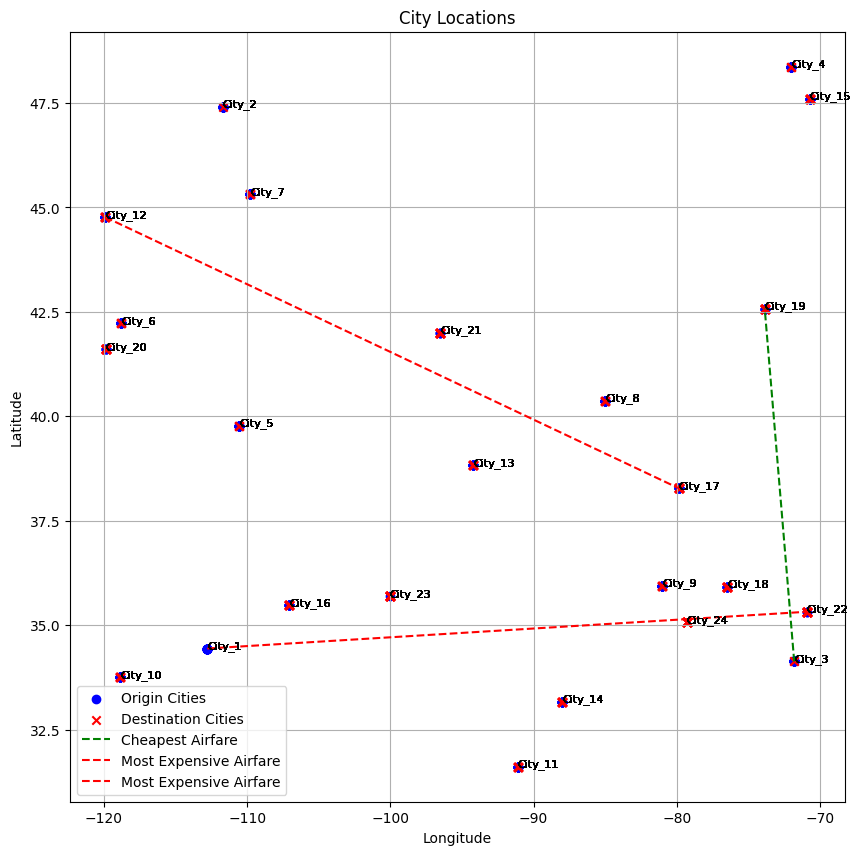

In [45]:
plt.figure(figsize=(10, 6))

plt.scatter(all_flight_data['OriginLong'], all_flight_data['OriginLat'], label='Origin Cities', color='blue', marker='o')

plt.scatter(all_flight_data['DestLong'], all_flight_data['DestLat'], label='Destination Cities', color='red', marker='x')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('City Locations')

for i, row in all_flight_data.iterrows():
    plt.text(row['OriginLong'], row['OriginLat'], row['OriginCity'], fontsize=8)
    plt.text(row['DestLong'], row['DestLat'], row['DestCity'], fontsize=8)
expensive_row = data[data['AirFarePrice'] == data['AirFarePrice'].max()]
cheapest_row = all_flight_data[all_flight_data['AirFarePrice'] == all_flight_data['AirFarePrice'].min()]

plt.plot([cheapest_row['OriginLong'], cheapest_row['DestLong']], [cheapest_row['OriginLat'], cheapest_row['DestLat']], 'g--', label='Cheapest Airfare')
plt.plot([expensive_row['OriginLong'], expensive_row['DestLong']], [expensive_row['OriginLat'], expensive_row['DestLat']], 'r--', label='Most Expensive Airfare')
plt.legend()

plt.grid(True)
fig = plt.gcf()
fig.set_size_inches(10, 10)
plt.savefig("./dataset/P5/out/p5_plot_5.png",dpi=100)
plt.show()